In [55]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from os import listdir
from skimage import io
from scipy.misc import imresize
import keras
from keras.optimizers import Adam
import pandas as pd
import pylab as plt

In [56]:
img_size = 64
batch_size = 128
epochs = 50

# load image
data_path='C:/Users/pli6894/Desktop/Train_Data/'
labels = listdir(data_path)
x_cat=[];
x_dog=[];



In [57]:
cat_imgpath = listdir(data_path+'/'+labels[0])
dog_imgpath = listdir(data_path+'/'+labels[1])

for img in cat_imgpath:
    cat_img = io.imread(data_path+'/'+labels[0]+'/'+img)
    x_cat.append(imresize(cat_img, (img_size, img_size, 3)))
    y_cat=np.ones(len(cat_imgpath))
for img in dog_imgpath:
    dog_img = io.imread(data_path + '/' + labels[1] + '/' + img)
    x_dog.append(imresize(dog_img, (img_size, img_size, 3)))

y_cat = np.zeros(len(cat_imgpath))
y_dog = np.ones(len(dog_imgpath))

x=np.asarray(x_cat+x_dog)
y=np.append(y_cat,y_dog)

C:\Users\pli6894\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\pli6894\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [58]:
catImages = listdir(data_path+'/'+labels[0])
print ("Number of Cat images - ",str(len(catImages)))

dogImages = listdir(data_path+'/'+labels[1])
print ("Number of Dog images - ",str(len(dogImages)))

Number of Cat images -  700
Number of Dog images -  699


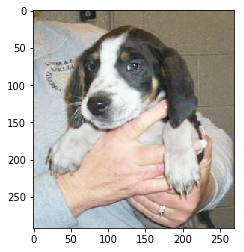

In [59]:
from PIL import Image
import random

dogFilename = 'C:/Users/pli6894/Desktop/Train_Data/dog/'+dogImages[2]
dimage = Image.open(dogFilename)

plt.imshow(dimage)

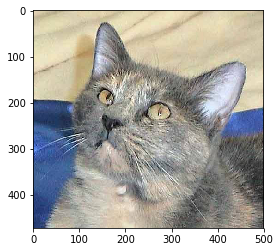

In [60]:
catFilename = 'C:/Users/pli6894/Desktop/Train_Data/cat/'+catImages[28]
cimage = Image.open(catFilename)

plt.imshow(cimage)

In [61]:
y = keras.utils.to_categorical(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=300)

In [ ]:
train_x

Basic Model (no changes) -- Does not converge

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 61506     
_________________________________________________________________
activation_31 (Activation)   (None, 2)                 0         
Total params: 62,402
Trainable params: 62,402
Non-trainable params: 0
_________________________________________________________________


In [64]:
k = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=batch_size,
 epochs=epochs,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1119 samples, validate on 280 samples
Epoch 1/50
1119/1119 [==============================] - 9s 8ms/step - loss: 7.4338 - acc: 0.4861 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 2/50
1119/1119 [==============================] - 8s 7ms/step - loss: 8.1226 - acc: 0.4933 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 3/50
1119/1119 [==============================] - 8s 7ms/step - loss: 8.1226 - acc: 0.4933 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 4/50
1119/1119 [==============================] - 9s 8ms/step - loss: 8.1226 - acc: 0.4933 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 5/50
1119/1119 [==============================] - 8s 7ms/step - loss: 8.1226 - acc: 0.4933 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 6/50
1119/1119 [==============================] - 8s 7ms/step - loss: 8.1226 - acc: 0.4933 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 7/50
1119/1119 [==============================] - 8s 7ms/step - loss: 8.1226 - acc: 0.4933 - val_loss: 7.5571 - val_acc: 0.5286
Epoch 8/50
1119

model h - softmax to Sigmoid

In [68]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('sigmoid'))
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_34 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 61506     
_________________________________________________________________
activation_35 (Activation)   (None, 2)                 0         
Total params: 62,402
Trainable params: 62,402
Non-trainable params: 0
_________________________________________________________________


In [70]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=batch_size,
 epochs=epochs,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1119 samples, validate on 280 samples
Epoch 1/50
1119/1119 [==============================] - 8s 7ms/step - loss: 2.7671 - acc: 0.5040 - val_loss: 1.9856 - val_acc: 0.5000
Epoch 2/50
1119/1119 [==============================] - 7s 6ms/step - loss: 1.1588 - acc: 0.5067 - val_loss: 1.0249 - val_acc: 0.5036
Epoch 3/50
1119/1119 [==============================] - 8s 7ms/step - loss: 0.7975 - acc: 0.5206 - val_loss: 0.7489 - val_acc: 0.5232
Epoch 4/50
1119/1119 [==============================] - 8s 7ms/step - loss: 0.6534 - acc: 0.5880 - val_loss: 0.6586 - val_acc: 0.6071
Epoch 5/50
1119/1119 [==============================] - 8s 7ms/step - loss: 0.6035 - acc: 0.6693 - val_loss: 0.6439 - val_acc: 0.6393
Epoch 6/50
1119/1119 [==============================] - 9s 8ms/step - loss: 0.5569 - acc: 0.7256 - val_loss: 0.6378 - val_acc: 0.6482
Epoch 7/50
1119/1119 [==============================] - 9s 8ms/step - loss: 0.5199 - acc: 0.7641 - val_loss: 0.6553 - val_acc: 0.6250
Epoch 8/50
1119

model m - sigmoid to relu

In [86]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('relu'))
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_46 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 61506     
_________________________________________________________________
activation_47 (Activation)   (None, 2)                 0         
Total params: 62,402
Trainable params: 62,402
Non-trainable params: 0
_________________________________________________________________


In [88]:
m = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=batch_size,
 epochs=epochs,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1119 samples, validate on 280 samples
Epoch 1/50
1119/1119 [==============================] - 9s 8ms/step - loss: 8.1510 - acc: 0.2391 - val_loss: 7.5859 - val_acc: 0.2643
Epoch 2/50
1119/1119 [==============================] - 8s 7ms/step - loss: 8.1226 - acc: 0.2475 - val_loss: 7.5859 - val_acc: 0.2661
Epoch 3/50
1119/1119 [==============================] - 7s 7ms/step - loss: 8.1371 - acc: 0.2475 - val_loss: 7.5571 - val_acc: 0.2643
Epoch 4/50
1119/1119 [==============================] - 7s 7ms/step - loss: 8.1226 - acc: 0.2466 - val_loss: 7.5571 - val_acc: 0.2643
Epoch 5/50
1119/1119 [==============================] - 7s 6ms/step - loss: 8.1226 - acc: 0.2466 - val_loss: 7.5571 - val_acc: 0.2643
Epoch 6/50
1119/1119 [==============================] - 7s 7ms/step - loss: 8.1226 - acc: 0.2466 - val_loss: 7.5571 - val_acc: 0.2643
Epoch 7/50
1119/1119 [==============================] - 7s 7ms/step - loss: 8.1226 - acc: 0.2466 - val_loss: 7.5571 - val_acc: 0.2643
Epoch 8/50
1119

model p - Extra layers & back to sigmoid

In [151]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
model.add(Conv2D(16, (3,1))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('sigmoid')) 
model.add(Dense(2))
model.add(Activation('sigmoid'))
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_133 (Activation)  (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 29, 31, 16)        1552      
_________________________________________________________________
activation_134 (Activation)  (None, 29, 31, 16)        0         
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 14, 15, 16)        0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 3360)              0         
__________

In [153]:
p = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=batch_size,
 epochs=epochs,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1119 samples, validate on 280 samples
Epoch 1/50
1119/1119 [==============================] - 13s 12ms/step - loss: 0.7081 - acc: 0.5054 - val_loss: 0.7077 - val_acc: 0.4714
Epoch 2/50
1119/1119 [==============================] - 9s 8ms/step - loss: 0.6954 - acc: 0.5013 - val_loss: 0.6915 - val_acc: 0.5125
Epoch 3/50
1119/1119 [==============================] - 8s 8ms/step - loss: 0.6883 - acc: 0.5487 - val_loss: 0.6873 - val_acc: 0.5571
Epoch 4/50
1119/1119 [==============================] - 8s 8ms/step - loss: 0.6806 - acc: 0.5956 - val_loss: 0.6805 - val_acc: 0.5911
Epoch 5/50
1119/1119 [==============================] - 9s 8ms/step - loss: 0.6696 - acc: 0.6041 - val_loss: 0.6689 - val_acc: 0.6107
Epoch 6/50
1119/1119 [==============================] - 9s 8ms/step - loss: 0.6581 - acc: 0.6421 - val_loss: 0.6596 - val_acc: 0.6607
Epoch 7/50
1119/1119 [==============================] - 8s 8ms/step - loss: 0.6513 - acc: 0.6332 - val_loss: 0.6867 - val_acc: 0.5411
Epoch 8/50
11

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


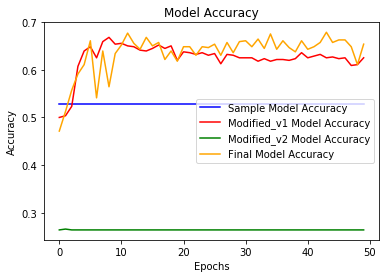

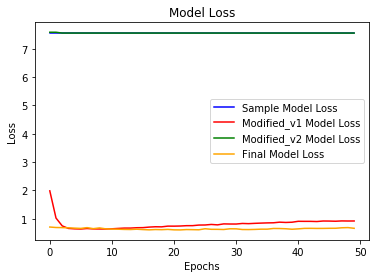

In [159]:
#k - sample model; accuracy = .52857
#h - softmax to sigmoid; accuracy = .6250
#m - sigmoid to relu; accuracy = .2643
#p - extra layers; accuracy = .6714 & .7125 (w/adam)
#s - relu | relu | softmax; accuracy = .5715
#t - Relu | tanh | sigmoid; accuracy = .4714

#Plot Accuracy & Loss for basic model

print(h.history.keys())
fig = plt.figure()
plt.plot(k.history['val_acc'], color='blue')
plt.plot(h.history['val_acc'], color='red')
plt.plot(m.history['val_acc'], color='green')
plt.plot(p.history['val_acc'], color='orange')
plt.legend(['Sample Model Accuracy', 'Modified_v1 Model Accuracy', 'Modified_v2 Model Accuracy', 'Final Model Accuracy'], 
           loc='center right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
fig

fig2 = plt.figure()
plt.plot(k.history['val_loss'], color ='blue')
plt.plot(h.history['val_loss'],color ='red')
plt.plot(m.history['val_loss'], color='green')
plt.plot(p.history['val_loss'], color='orange')
plt.legend(['Sample Model Loss', 'Modified_v1 Model Loss', 'Modified_v2 Model Loss', 'Final Model Loss'], 
           loc='center right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()


Investigate Kernal Size

In [160]:
def tryNewFilterSizeFn(h,w):
    model = Sequential()
    model.add(Conv2D(32, (h,w), input_shape=(img_size, img_size, 3)))
    model.add(Activation('sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
    model.add(Conv2D(16, (h,w))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Activation('sigmoid')) 
    model.add(Dense(2))
    model.add(Activation('sigmoid'))
    adamop=Adam(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(train_x, train_y,
    batch_size=batch_size,
    verbose = 0,
    epochs=5,
    shuffle=True)

    score = model.evaluate(test_x, test_y)
    pred=model.predict(test_x)
    loss = score[0]
    acc = score[1]
    return acc,loss

In [161]:
h_list = [3,3,1,9]
w_list = [3,1,3,1]

for h,w in map(lambda x,y:(x,y),h_list,w_list):
    print('Filter Size : '+str(h)+','+str(w))
    acc, loss = tryNewFilterSizeFn(h,w)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

Filter Size : 3,3
280/280 [==============================] - 3s 9ms/step
Test loss: 0.6863825644765581
Test accuracy: 0.5089285705770765
Filter Size : 3,1
280/280 [==============================] - 2s 8ms/step
Test loss: 0.6519612056868417
Test accuracy: 0.6214285731315613
Filter Size : 1,3
280/280 [==============================] - 2s 7ms/step
Test loss: 0.661370529447283
Test accuracy: 0.6125
Filter Size : 9,1
280/280 [==============================] - 3s 10ms/step
Test loss: 0.6883537633078439
Test accuracy: 0.5714285714285714


In [162]:
def tryNewActivationFn(conv_act, dense_act, output_act):
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3)))
    model.add(Activation(conv_act))
    model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
    model.add(Conv2D(16, (3,1))) 
    model.add(Activation(conv_act)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Activation(dense_act)) 
    model.add(Dense(2))
    model.add(Activation(output_act))
    adamop=Adam(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(train_x, train_y,
    batch_size=batch_size,
    verbose = 0,
    epochs=5,
    shuffle=True)

    score = model.evaluate(test_x, test_y)
    pred=model.predict(test_x)
    loss = score[0]
    acc = score[1]
    return acc,loss

In [163]:
convolution_fns = ['relu']
dense_fns = ['relu','tanh']
output_fns = ['softmax','sigmoid']

In [164]:
for conv_fn in convolution_fns:
    model.reset_states() #clear previous model weights
    for dense_fn in dense_fns:
        for output_fn in output_fns:
            print('Convolution Activation:', conv_fn, '| Hidden Activation:', dense_fn, '| Output Activation:', output_fn)
            acc, loss = tryNewActivationFn(conv_fn,dense_fn, output_fn)
            print('Test loss:', loss)
            print('Test accuracy:', acc)

Convolution Activation: relu | Hidden Activation: relu | Output Activation: softmax
280/280 [==============================] - 2s 9ms/step
Test loss: 0.8288689426013401
Test accuracy: 0.5499999982970102
Convolution Activation: relu | Hidden Activation: relu | Output Activation: sigmoid
280/280 [==============================] - 2s 8ms/step
Test loss: 0.6898464356149946
Test accuracy: 0.5089285714285714
Convolution Activation: relu | Hidden Activation: tanh | Output Activation: softmax
280/280 [==============================] - 2s 8ms/step
Test loss: 0.6963132177080427
Test accuracy: 0.4714285705770765
Convolution Activation: relu | Hidden Activation: tanh | Output Activation: sigmoid
280/280 [==============================] - 2s 9ms/step
Test loss: 0.6921511037009103
Test accuracy: 0.5285714268684387


Cost Function & Optimizers

In [178]:
def tryNewOptFn(opt):
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3)))
    model.add(Activation('sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
    model.add(Conv2D(16, (3,1))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(16))
    model.add(Activation('sigmoid')) 
    model.add(Dense(2))
    model.add(Activation('sigmoid'))
    adamop=Adam(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    model.fit(train_x, train_y,
    batch_size=batch_size,
    verbose = 0,
    epochs=10,
    shuffle=True)

    score = model.evaluate(test_x, test_y)
    pred=model.predict(test_x)
    loss = score[0]
    acc = score[1]
    return acc,loss

In [179]:
opt_list = ['sgd','adam','adamax','adagrad']

In [180]:
for opt in opt_list:
    print('Optimizer:', opt)
    acc, loss = tryNewOptFn(opt)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

Optimizer: sgd
280/280 [==============================] - 3s 9ms/step
Test loss: 0.6959082041467939
Test accuracy: 0.4785714302744184
Optimizer: adam
280/280 [==============================] - 3s 10ms/step
Test loss: 0.62811781167984
Test accuracy: 0.6785714302744185
Optimizer: adamax
280/280 [==============================] - 3s 10ms/step
Test loss: 0.636197807107653
Test accuracy: 0.6053571437086378
Optimizer: adagrad
280/280 [==============================] - 3s 10ms/step
Test loss: 0.6935861161776952
Test accuracy: 0.5


VISUALIZE THE CNN

# Visualize the CNN: https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

In [182]:
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import math

def step_decay(epoch):
    
    
    initial_lrate=0.01
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [183]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
model.add(Conv2D(16, (3,1))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('sigmoid')) 
model.add(Dense(2))
model.add(Activation('sigmoid'))
adamop=Adam(lr=0.1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [184]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
activation_205 (Activation)  (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 29, 31, 16)        1552      
_________________________________________________________________
activation_206 (Activation)  (None, 29, 31, 16)        0         
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 14, 15, 16)        0         
_________________________________________________________________
flatten_61 (Flatten)         (None, 3360)              0         
__________

In [185]:
history=model.fit(train_x, train_y, validation_data=(test_x, test_y),
                          epochs=50,callbacks=callbacks_list,verbose=0)

score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

280/280 [==============================] - 1s 5ms/step
Test loss: 0.6940284814153399
Test accuracy: 0.4714285705770765


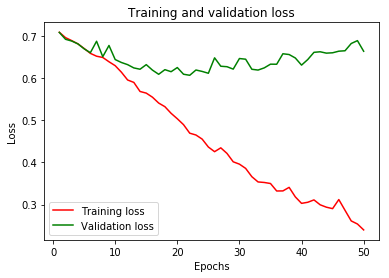

In [186]:
#Training & Validation Loss

import matplotlib.pyplot as plt
loss = p.history['loss']
val_loss = p.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

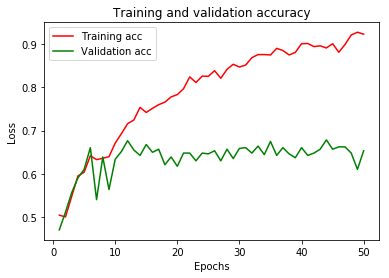

In [187]:
# Training & Validation Accuracy

acc = p.history['acc']
val_acc = p.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [202]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_x[35].reshape(1,64,64,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

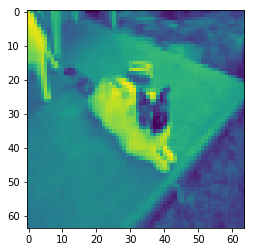

In [203]:
plt.imshow(train_x[35][:,:,0]);

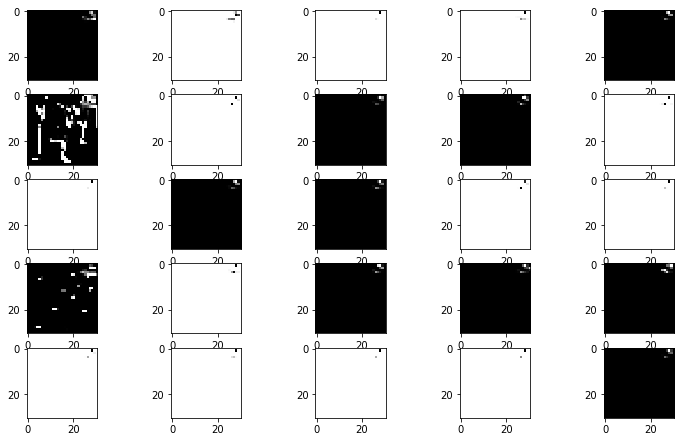

In [195]:
display_activation(activations, 5, 5, 2) #convolution one 

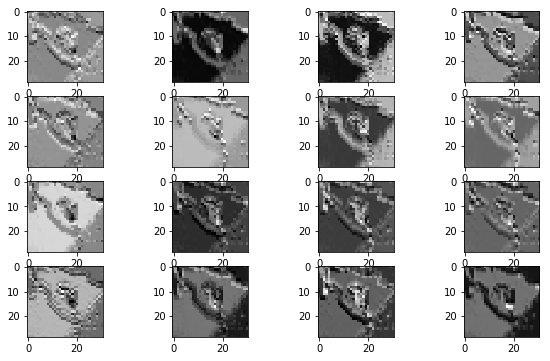

In [205]:
display_activation(activations, 4, 4, 3) #max pool one 

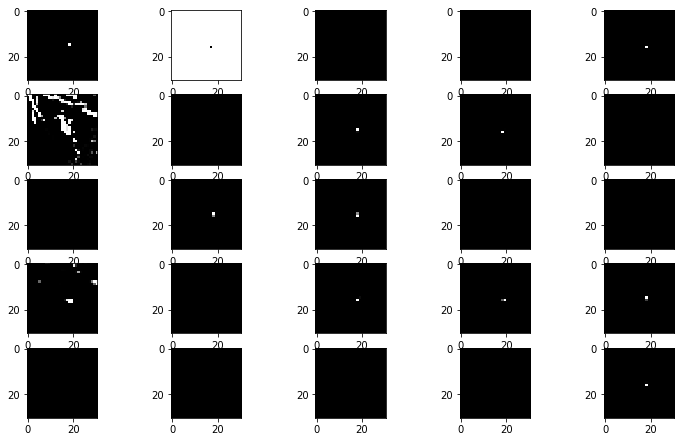

In [208]:
display_activation(activations, 5, 5, 2) # convolution 2